<a href="https://colab.research.google.com/github/Juricasfi/IA/blob/main/clasificacion_noticieros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

## Decodificar el texto

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i  in train_data[0]])

## Vectorizar los datos

import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.

  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Decodificar las etiquetas con la ayuda de Keras(se usa el mismo método del ejemplo anterior pero la construcción en keras)

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

550378/550378 [==============================] - 0s 1us/step


Ya que hay varias clases las salidas de la red neuronal son varias, si las capas no tienen la suficiente densidad pueden actuar como un cuelle de botella de información y las capas posteriores no recibirían gran parte le la información, por esta razón se usan capas más densas

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(64, activation = "relu"),
                         layers.Dense(64, activation = "relu"),
                         layers.Dense(46, activation = "softmax")
                         ])
model.compile()

In [3]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [4]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 139ms/step - loss: 2.7051 - accuracy: 0.4990 - val_loss: 1.8391 - val_accuracy: 0.6210
Epoch 2/20
16/16 [==============================] - 1s 64ms/step - loss: 1.5436 - accuracy: 0.6763 - val_loss: 1.3636 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 1s 57ms/step - loss: 1.1815 - accuracy: 0.7388 - val_loss: 1.1893 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.9728 - accuracy: 0.7848 - val_loss: 1.0830 - val_accuracy: 0.7480
Epoch 5/20
16/16 [==============================] - 1s 57ms/step - loss: 0.8033 - accuracy: 0.8235 - val_loss: 1.0030 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 1s 56ms/step - loss: 0.6695 - accuracy: 0.8573 - val_loss: 0.9428 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.5596 - accuracy: 0.8790 - val_loss: 0.9084 - val_accuracy: 0.8150
Epoch 8/20
1

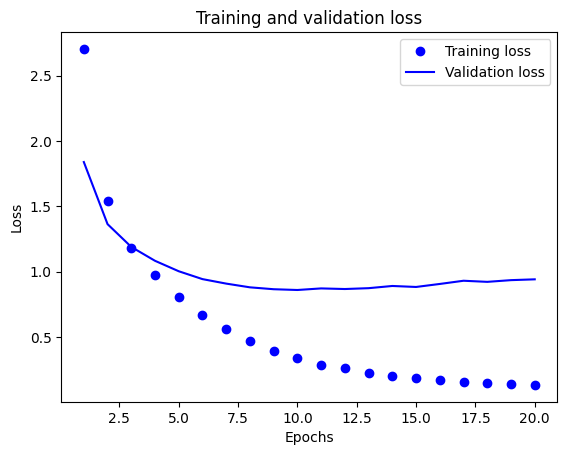

In [6]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



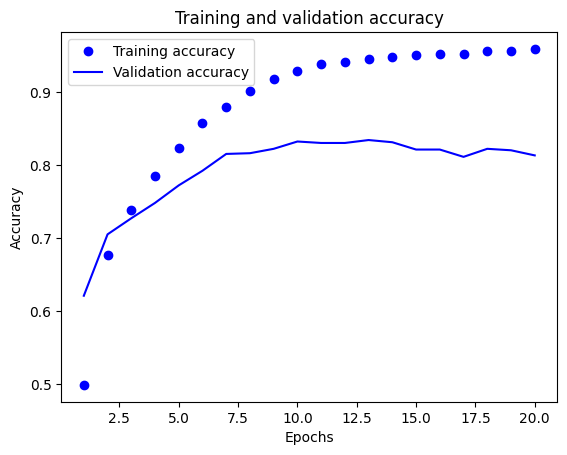

In [7]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
